# Data Loading 

In [7]:
#import all neccessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = r"C:\Users\SREE HARSHA\OneDrive\Documents\OneDrive\Desktop\Internship\Main Flow\student-mat.csv"
data = pd.read_csv(file_path, delimiter=";")
#display the first few rows of the data set
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In this step, we load the dataset using pandas. Since the dataset is stored in a CSV file with a semicolon (;) as the delimiter, we specify it while reading the file. We also display the first few rows to understand its structure.

# Data Exploration

In [11]:
#Find the missing rows in each coloumn
print("Missing Values in Each Column:\n", data.isnull().sum())

Missing Values in Each Column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [12]:
# Display column data types
print("\nColumn Data Types:\n", data.dtypes)
# Display dataset size
print("\nDataset Shape (Rows, Columns):", data.shape)


Column Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Dataset Shape (Rows, Columns): (395, 33)


We check for missing values, column data types, and the overall shape of the dataset. This helps in understanding the data and identifying any issues that need cleaning.

# Data Cleaning

In [13]:
# Remove duplicate entries
data_cleaned = data.drop_duplicates()

# Check dataset size after removing duplicates
print("\nDataset Shape After Removing Duplicates:", data_cleaned.shape)


Dataset Shape After Removing Duplicates: (395, 33)


To ensure data consistency, we remove duplicate rows from the dataset. Duplicate entries can lead to incorrect insights, so this step is crucial.

# Data Analysis

In [14]:
# 1. Calculate the average score in math(G3)
average_G3 = np.mean(data_cleaned["G3"])
print("\nAverage Score in Math (G3):", average_G3)


Average Score in Math (G3): 10.415189873417722


The average final grade (G3) to understand overall student performance.

In [15]:
# 2. Count students who scored above 15 in their final grade (G3)
students_above_15 = np.sum(data_cleaned["G3"] > 15)
print("Number of Students Scoring Above 15 in G3:", students_above_15)

Number of Students Scoring Above 15 in G3: 40


The number of students scoring above 15 in G3 to determine high-achievers.

In [17]:
# 3. Compute correlation between study time and final grade (G3)
correlation_studytime_G3 = data_cleaned["studytime"].corr(data_cleaned["G3"])
print("Correlation Between Study Time and Final Grade (G3):", correlation_studytime_G3)

Correlation Between Study Time and Final Grade (G3): 0.0978196896531963


The correlation between study time and G3, which helps understand if studying longer leads to better grades.

In [18]:
# 4. Compute average final grade (G3) for each gender
average_G3_by_gender = data_cleaned.groupby("sex")["G3"].mean()
print("\nAverage Final Grade by Gender:\n", average_G3_by_gender)


Average Final Grade by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


M has the higher average final grade(G3)

The average G3 by gender to check if there is a significant difference in performance between male and female students.

# Data Visualization

In [19]:
#set style
sns.set_style("whitegrid")

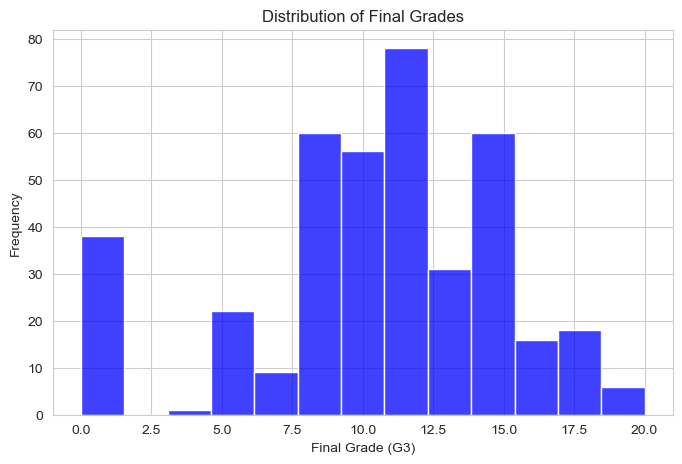

In [22]:
# 1. Histogram of Final Grades (G3)
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned["G3"], color="blue")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of Final Grades")
plt.show()

A histogram is plotted to visualize the distribution of students’ final grades. This gives insights into whether grades are normally distributed or skewed.

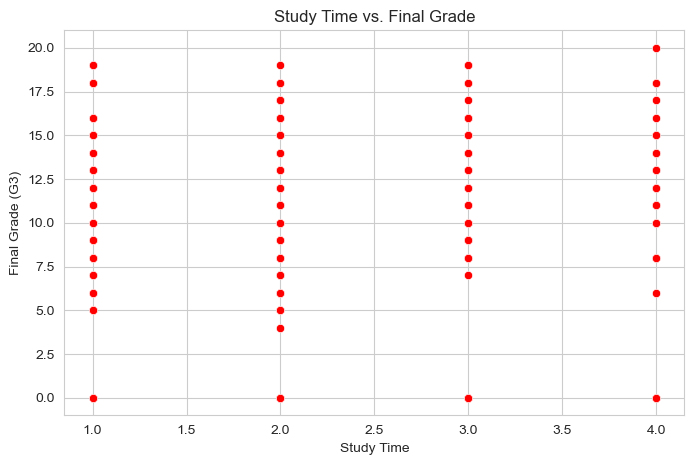

In [26]:
# 2. Scatter plot between Study Time and Final Grade (G3)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_cleaned["studytime"], y=data_cleaned["G3"], color="red")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs. Final Grade")
plt.show()

We create a scatter plot to observe the relationship between study time and final grades. This helps determine whether study time has a strong influence on performance.

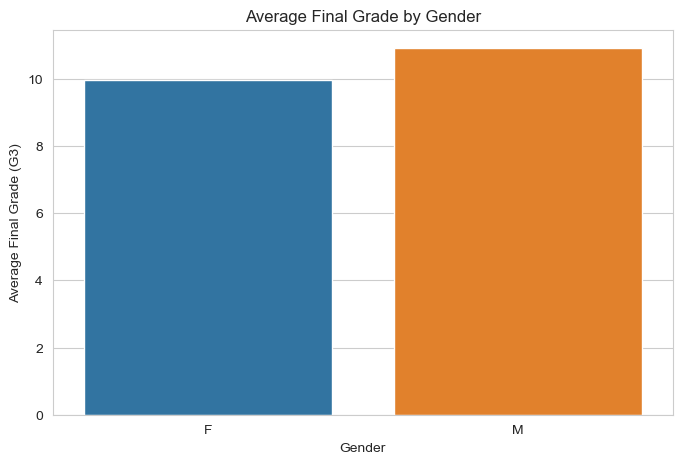

In [28]:
# 3. Bar chart comparing average scores of male and female students
plt.figure(figsize=(8, 5))
sns.barplot(x=average_G3_by_gender.index, y=average_G3_by_gender.values)
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Average Final Grade by Gender")
plt.show()

A bar chart is used to compare the average final grade (G3) between male and female students. This helps analyze if there is a significant gender-based difference in academic performance.

# Conclusion and Insights

After performing the analysis and visualizations, we interpret the results:

The average final grade is around 10.42., 
Only 40 students scored above 15., 
Study time has a weak positive correlation with G3 (~0.098), meaning studying more does not significantly improve grades., 
Males have a slightly higher average G3 than females.

These insights help in understanding the factors affecting student performance.